# Import Neccessary Librabies

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import random

import matplotlib.pyplot as plt
%matplotlib inline

plt.style.use('ggplot')
import matplotlib.style as style
style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = (15, 8)


from sklearn import preprocessing
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("/content/drive/MyDrive/logs_dataset_final.csv")

In [4]:
df

,@timestamp,_id,ip_address
0,"July 8th 2024, 14:43:03.000",XswJ0msBoTGddM7vxMDB,10.1.1.285
1,"July 8th 2024, 14:43:01.000",dKQJ0msB7mP0GwVzvJjz,10.1.2.389
2,"July 8th 2024, 14:42:59.000",CcwJ0msBoTGddM7vtb8y,10.1.1.415
3,"July 8th 2024, 14:42:57.000",bKQJ0msB7mP0GwVzrZdT,10.1.1.79
4,"July 8th 2024, 14:42:55.000",L6QJ0msB7mP0GwVzpZeI,10.1.1.60
...,...,...,...
721542,"June 9th 2024, 00:00:25.000",dkWJOWsBoTGddM7vRUOR,10.1.2.66
721543,"June 9th 2024, 00:00:19.000",TBuJOWsB7mP0GwVzLmol,10.1.1.249
721544,"June 9th 2024, 00:00:15.000",vUWJOWsBoTGddM7vHkGD,10.1.1.200
721545,"June 9th 2024, 00:00:09.000",aUWJOWsBoTGddM7vB0AR,10.1.2.432


# Feature Extraction

In [5]:
df['@timestamp'] = pd.to_datetime(df['@timestamp'], format='mixed', errors='coerce')

This changes the timestamp from original to modified form

In [6]:
df.sort_values(['ip_address', '@timestamp'], inplace=True)

This sorts the dataset wrt to ip address and timestamp

In [7]:
df['shift_time'] = df.groupby(['ip_address'])['@timestamp'].shift(1)

It creates shift_time column one shiftdown for timestamp coumn

In [8]:
df['time_diff'] = (df['@timestamp'] -df['shift_time']).dt.seconds//60

Finding the time differnce between timestamp and shift time

In [9]:
df['date'] = df['@timestamp'].dt.date

Extracting the date from timestamp and creating seperate column

In [10]:
df['weekday'] = df['@timestamp'].dt.weekday

Extracting the no of weekdays present in timestamp

In [11]:
df['hour'] = df['@timestamp'].dt.hour

Finding the no.of hours present in timestamp column

In [12]:
df['is_weekend'] = ((df['weekday']==5 |(df['weekday']==6)).astype(int))

Finding how many weekend are present in timestamp

In [13]:
df['hour_bucket'] = df['hour']//4

In [14]:
df

,@timestamp,_id,ip_address,shift_time,time_diff,date,weekday,hour,is_weekend,hour_bucket
721473,2024-06-09 00:06:09,DBuOOWsB7mP0GwVzhZ9U,10.1.1.1,NaT,NaN,2024-06-09,6,0,0,0
720483,2024-06-09 01:28:39,bB7aOWsB7mP0GwVzDY5G,10.1.1.1,2024-06-09 00:06:09,82.0,2024-06-09,6,1,0,0
719233,2024-06-09 03:12:49,R0w5OmsBoTGddM7vayZT,10.1.1.1,2024-06-09 01:28:39,104.0,2024-06-09,6,3,0,0
719222,2024-06-09 03:13:45,U0w6OmsBoTGddM7vRi8R,10.1.1.1,2024-06-09 03:12:49,0.0,2024-06-09,6,3,0,0
718875,2024-06-09 03:42:39,z01UOmsBoTGddM7vuzyC,10.1.1.1,2024-06-09 03:13:45,28.0,2024-06-09,6,3,0,0
...,...,...,...,...,...,...,...,...,...,...
3225,2024-07-08 11:49:00,3cBq0WsBoTGddM7va5TJ,10.1.2.99,2024-07-08 11:47:15,1.0,2024-07-08,0,11,0,2
2422,2024-07-08 12:22:29,QMKJ0WsBoTGddM7vE9N1,10.1.2.99,2024-07-08 11:49:00,33.0,2024-07-08,0,12,0,3
1704,2024-07-08 12:52:25,9pyk0WsB7mP0GwVze7sV,10.1.2.99,2024-07-08 12:22:29,29.0,2024-07-08,0,12,0,3
1138,2024-07-08 13:15:59,B8a60WsBoTGddM7vDnqQ,10.1.2.99,2024-07-08 12:52:25,23.0,2024-07-08,0,13,0,3


In [15]:
ip_addr ='ip_address'

In [16]:
ip_counts = df.groupby(ip_addr)['@timestamp'].count().reset_index()

Counting how many times the user in logging into the computer wrt to ip address

In [17]:
ip_counts

,ip_address,@timestamp
0,10.1.1.1,1446
1,10.1.1.100,2860
2,10.1.1.101,1465
3,10.1.1.106,1408
4,10.1.1.109,1459
...,...,...
381,10.1.2.86,4307
382,10.1.2.89,2826
383,10.1.2.90,2904
384,10.1.2.95,2868


In [18]:
ip_counts = ip_counts.rename(columns={'@timestamp':'total_count'})

In [19]:
daily_counts = df.groupby([ip_addr,'date'])['@timestamp'].count().reset_index()

In [20]:
daily_counts

,ip_address,date,@timestamp
0,10.1.1.1,2024-06-09,36
1,10.1.1.1,2024-06-10,37
2,10.1.1.1,2024-06-11,70
3,10.1.1.1,2024-06-12,38
4,10.1.1.1,2024-06-13,32
...,...,...,...
11575,10.1.2.99,2024-07-04,79
11576,10.1.2.99,2024-07-05,61
11577,10.1.2.99,2024-07-06,89
11578,10.1.2.99,2024-07-07,47


In [21]:
daily_counts = daily_counts.rename(columns={'@timestamp':'daily_counts'})

In [22]:
daily_counts_avg = daily_counts.groupby(ip_addr).daily_counts.median().reset_index()

Calculating the median of the counts for all the date having the same ip address

In [23]:
daily_counts_avg.head(5)

,ip_address,daily_counts
0,10.1.1.1,40.0
1,10.1.1.100,78.0
2,10.1.1.101,40.0
3,10.1.1.106,35.5
4,10.1.1.109,42.5


In [24]:
weekend_counts = df.groupby([ip_addr, 'is_weekend'])['@timestamp'].count().reset_index()

In [25]:
weekend_counts

,ip_address,is_weekend,@timestamp
0,10.1.1.1,0,1245
1,10.1.1.1,1,201
2,10.1.1.100,0,2463
3,10.1.1.100,1,397
4,10.1.1.101,0,1260
...,...,...,...
767,10.1.2.90,1,395
768,10.1.2.95,0,2478
769,10.1.2.95,1,390
770,10.1.2.99,0,1198


In [26]:
weekend_counts = weekend_counts.rename(columns={'@timestamp':'weekend_counts'})

In [27]:
weekend_counts.head()

,ip_address,is_weekend,weekend_counts
0,10.1.1.1,0,1245
1,10.1.1.1,1,201
2,10.1.1.100,0,2463
3,10.1.1.100,1,397
4,10.1.1.101,0,1260


calucating no.of logins occured in the weekends and weekdays

In [28]:
weekend_counts_avg = weekend_counts.pivot_table(index=ip_addr, columns='is_weekend').reset_index([0])

In [29]:
weekend_counts_avg.head()

ip_address weekend_counts       
is_weekend                          0      1
0             10.1.1.1         1245.0  201.0
1           10.1.1.100         2463.0  397.0
2           10.1.1.101         1260.0  205.0
3           10.1.1.106         1190.0  218.0
4           10.1.1.109         1244.0  215.0

In [30]:
weekend_counts_avg.columns = weekend_counts_avg.columns.droplevel()

In [31]:
weekend_counts_avg

is_weekend,,0,1
0,10.1.1.1,1245.0,201.0
1,10.1.1.100,2463.0,397.0
2,10.1.1.101,1260.0,205.0
3,10.1.1.106,1190.0,218.0
4,10.1.1.109,1244.0,215.0
...,...,...,...
381,10.1.2.86,3699.0,608.0
382,10.1.2.89,2435.0,391.0
383,10.1.2.90,2509.0,395.0
384,10.1.2.95,2478.0,390.0


In [32]:
weekend_counts_avg.columns = [ip_addr, 'week_day', 'weekend']

In [33]:
weekend_counts_avg['is_weekend_ratio'] = weekend_counts_avg['week_day']/ weekend_counts_avg['weekend']

finding the ratio between weekday and weekend

In [34]:
weekend_counts_avg.head()

,ip_address,week_day,weekend,is_weekend_ratio
0,10.1.1.1,1245.0,201.0,6.194030
1,10.1.1.100,2463.0,397.0,6.204030
2,10.1.1.101,1260.0,205.0,6.146341
3,10.1.1.106,1190.0,218.0,5.458716
4,10.1.1.109,1244.0,215.0,5.786047


In [35]:
lean_weekend_counts_avg = weekend_counts_avg[[ip_addr, 'is_weekend_ratio']]

In [36]:
lean_weekend_counts_avg.head()

,ip_address,is_weekend_ratio
0,10.1.1.1,6.194030
1,10.1.1.100,6.204030
2,10.1.1.101,6.146341
3,10.1.1.106,5.458716
4,10.1.1.109,5.786047


In [37]:
avg_time_data = df.groupby(ip_addr).agg({'time_diff':['mean','max']}).reset_index()

In [38]:
avg_time_data.head()

ip_address  time_diff       
                    mean    max
0    10.1.1.1  28.999308  362.0
1  10.1.1.100  14.427072  185.0
2  10.1.1.101  28.520492  211.0
3  10.1.1.106  29.771144  319.0
4  10.1.1.109  28.711934  278.0

In [39]:
avg_time_data.columns = avg_time_data.columns.droplevel()

In [40]:
avg_time_data.columns = [ip_addr, 'td_mean', 'td_max']

calulating the mean and max for time_diff column and labelling as td_mean and td_max

In [41]:
avg_time_data.head()

,ip_address,td_mean,td_max
0,10.1.1.1,28.999308,362.0
1,10.1.1.100,14.427072,185.0
2,10.1.1.101,28.520492,211.0
3,10.1.1.106,29.771144,319.0
4,10.1.1.109,28.711934,278.0


## Total Features Set

In [42]:
mer_1 = ip_counts.merge(daily_counts_avg, on=ip_addr, how='left')

In [43]:
mer_2 = mer_1.merge(lean_weekend_counts_avg, on=ip_addr, how='left')

In [44]:
final_dataset = mer_2.merge(avg_time_data, on=ip_addr, how='left')

In [45]:
final_dataset.head()

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max
0,10.1.1.1,1446,40.0,6.194030,28.999308,362.0
1,10.1.1.100,2860,78.0,6.204030,14.427072,185.0
2,10.1.1.101,1465,40.0,6.146341,28.520492,211.0
3,10.1.1.106,1408,35.5,5.458716,29.771144,319.0
4,10.1.1.109,1459,42.5,5.786047,28.711934,278.0


In [46]:
ip_map = final_dataset[ip_addr].to_dict()

In [47]:
RANDOM_STATE = 30

# KMeans

In [48]:
from sklearn.cluster import KMeans

In [49]:
final_dataset.columns

Index(['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio',
       'td_mean', 'td_max'],
      dtype='object')

Displaying the columns present in the final_dataset

In [50]:
requi_feature_cols = ['total_count', 'daily_counts', 'is_weekend_ratio', 'td_mean', 'td_max']

In [51]:
new_data = final_dataset[requi_feature_cols]

In [52]:
min_max_scaler = preprocessing.MinMaxScaler()

In [53]:
data_scaled = min_max_scaler.fit_transform(new_data)
new_data = pd.DataFrame(data_scaled,columns=requi_feature_cols)

In [54]:
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D

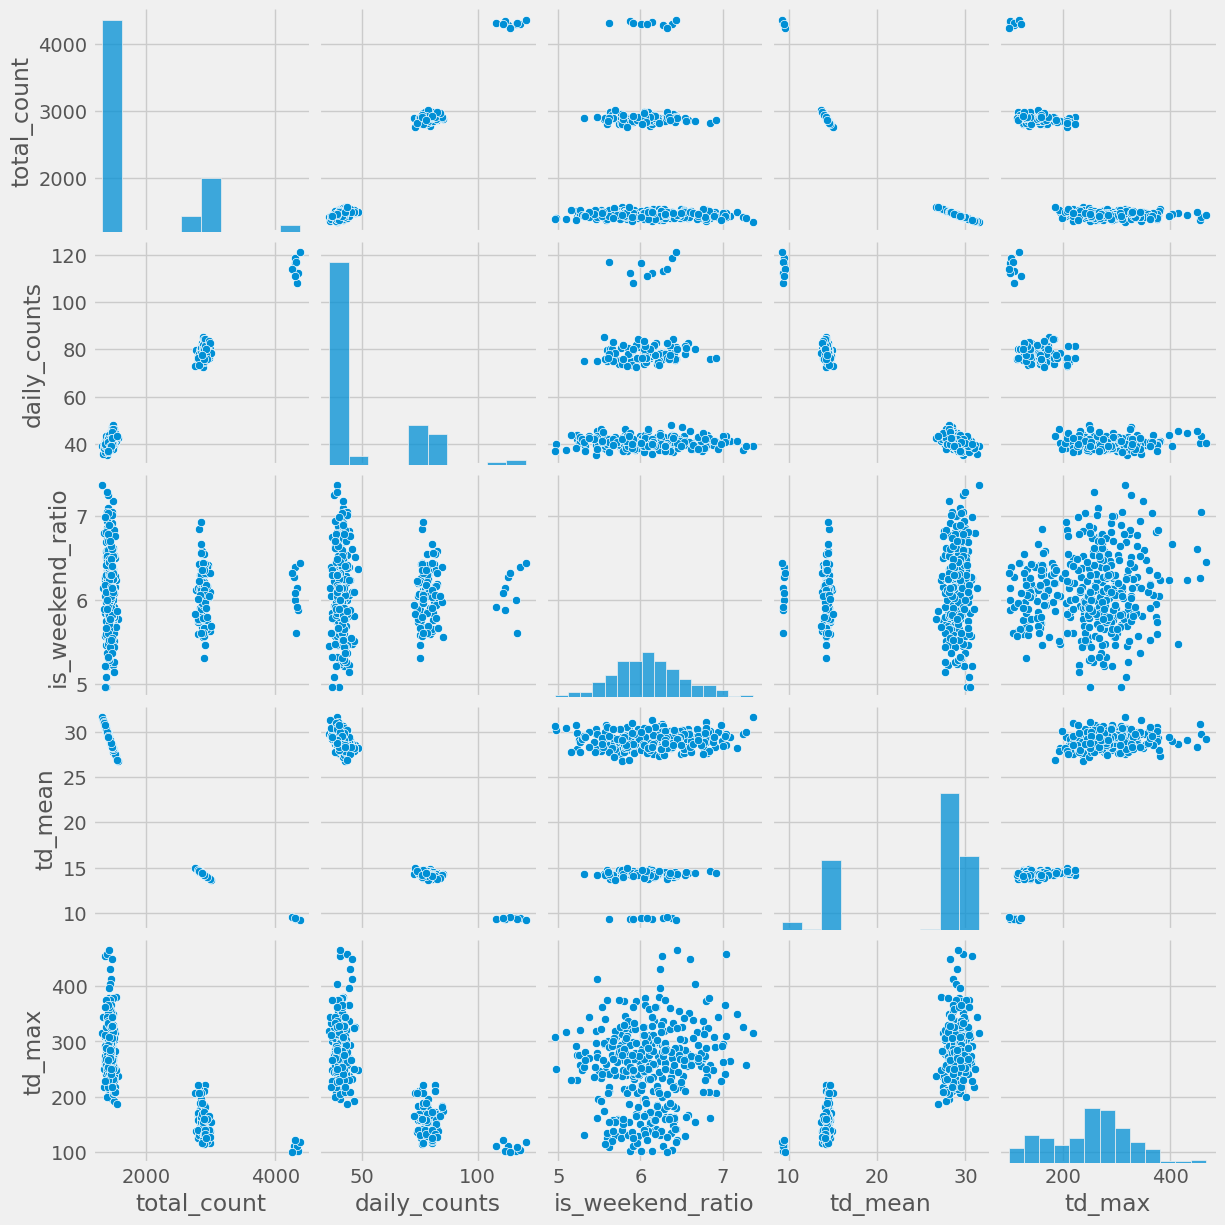

In [55]:
sns.pairplot(final_dataset[requi_feature_cols])

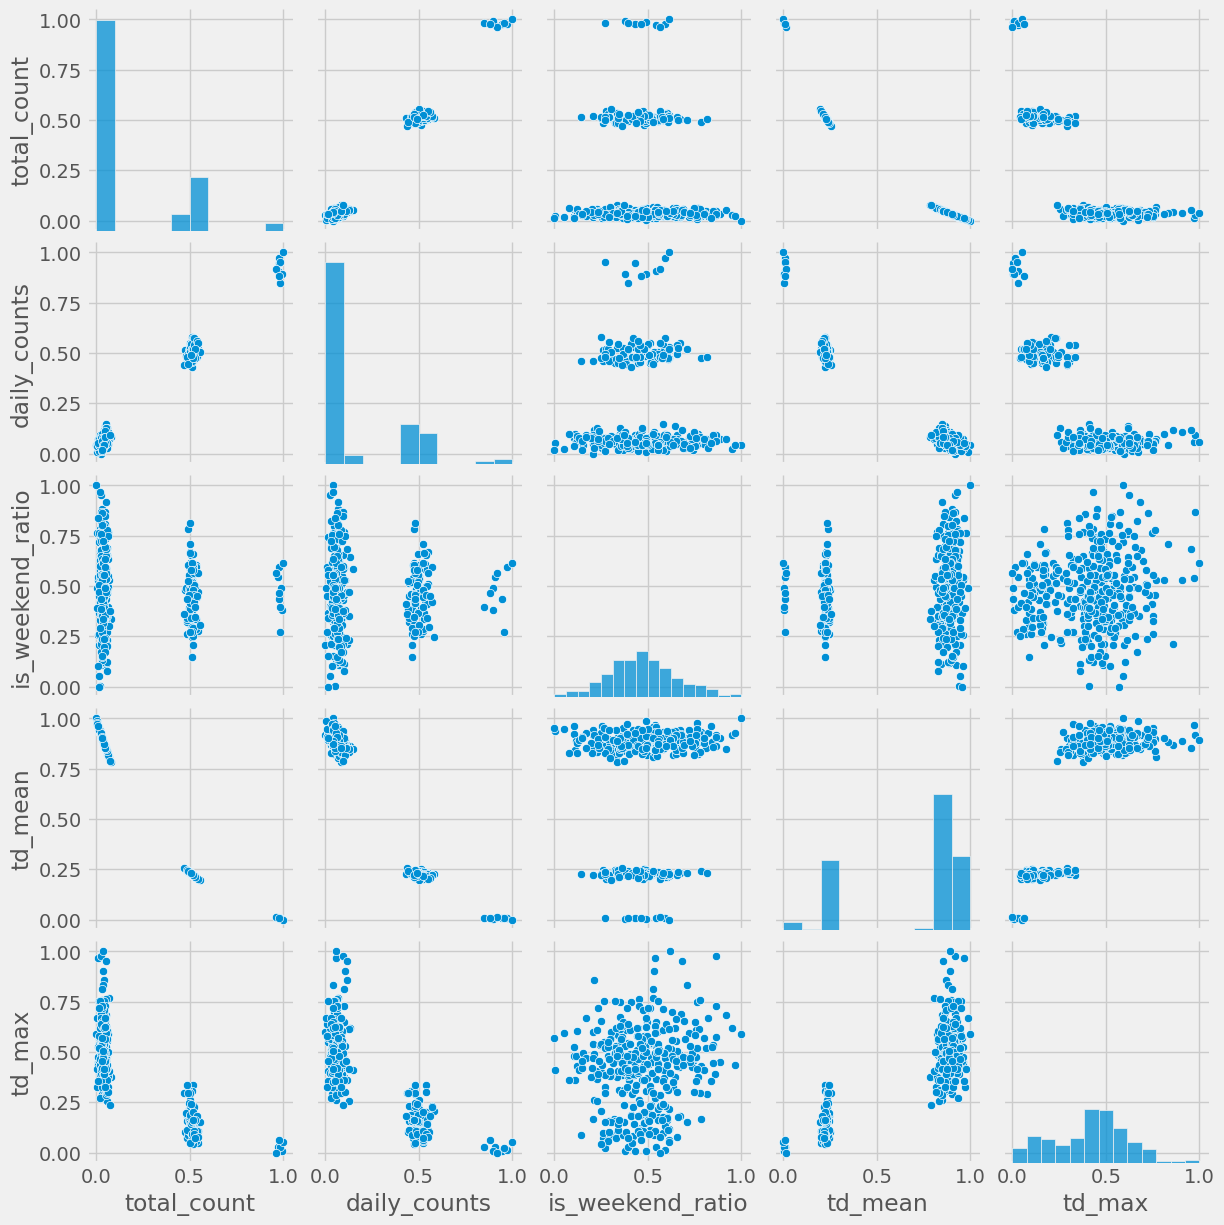

In [56]:
sns.pairplot(new_data)

In [57]:
cluster_num = range(1,15)

In [58]:
kmeans = [KMeans(n_clusters=i, random_state=RANDOM_STATE).fit(new_data) for i in cluster_num]

In [59]:
kmeans

[KMeans(n_clusters=1, random_state=30),
 KMeans(n_clusters=2, random_state=30),
 KMeans(n_clusters=3, random_state=30),
 KMeans(n_clusters=4, random_state=30),
 KMeans(n_clusters=5, random_state=30),
 KMeans(n_clusters=6, random_state=30),
 KMeans(n_clusters=7, random_state=30),
 KMeans(random_state=30),
 KMeans(n_clusters=9, random_state=30),
 KMeans(n_clusters=10, random_state=30),
 KMeans(n_clusters=11, random_state=30),
 KMeans(n_clusters=12, random_state=30),
 KMeans(n_clusters=13, random_state=30),
 KMeans(n_clusters=14, random_state=30)]

In [60]:
scores = [kmeans[i].score(new_data) for i in range(len(kmeans))]

In [61]:
scores

[-105.61717382018342,
 -22.662497940589923,
 -18.425259145173772,
 -11.34116401117781,
 -9.624264656308904,
 -7.6834491165191485,
 -6.605626776063946,
 -5.773343216208603,
 -5.2669670163554665,
 -4.731542252194097,
 -4.483092839218669,
 -4.1109723094544375,
 -3.9656970956213393,
 -3.803909950255066]

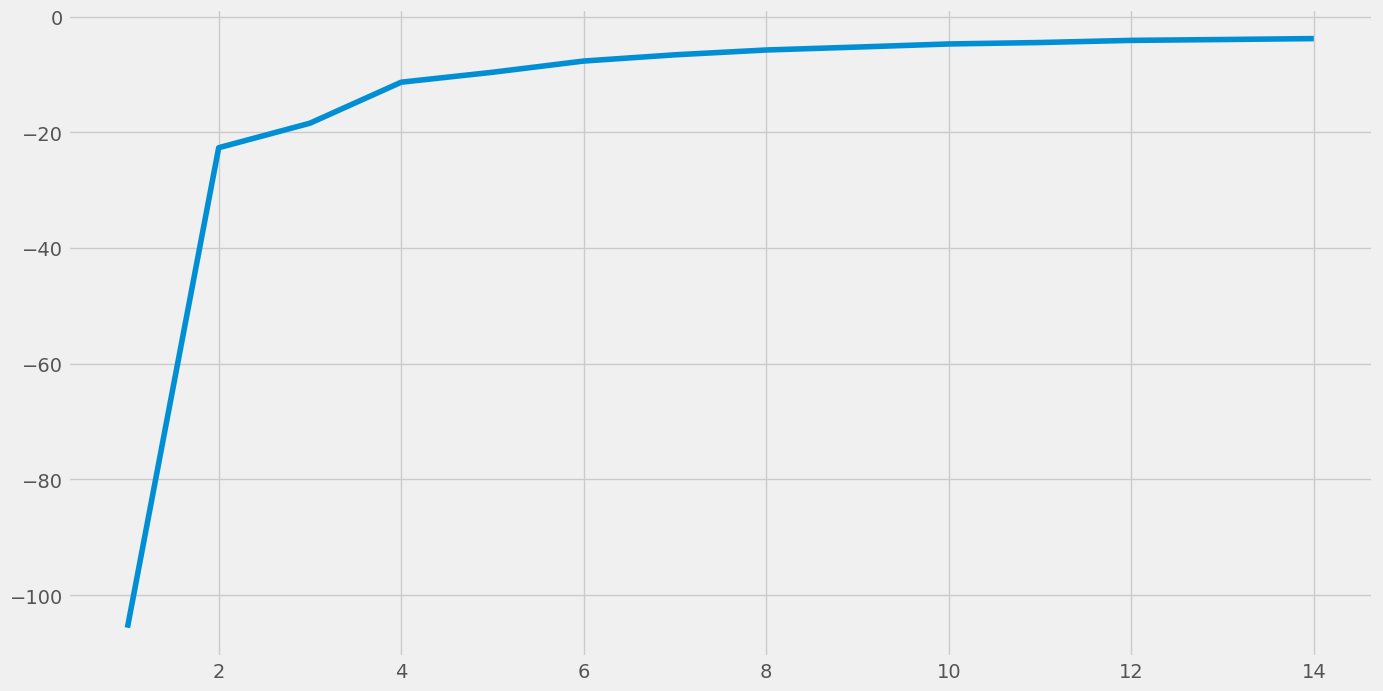

In [62]:
fig, sd = plt.subplots()
sd.plot(cluster_num,scores)
plt.show()

Displays the graph between no of clusters taken (i.e., 15) and scores calculate using kmeans

In [63]:
kmeans_cluster_model=kmeans[5]

In [64]:
kmeans_cluster_model

KMeans(n_clusters=6, random_state=30)

In [65]:
final_dataset['cluster'] = kmeans_cluster_model.predict(new_data)
final_dataset['cluster'].value_counts()

,count
cluster,
4,99
2,94
3,73
0,60
5,50
1,10


# Clustering model with TSNE

t-Distributed Stochastic Neighbor Embedding (t-SNE)

In [66]:
from sklearn.manifold import TSNE

In [67]:
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300, random_state=RANDOM_STATE)

In [68]:
tsne_result = tsne.fit_transform(new_data)

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 386 samples in 0.002s...
[t-SNE] Computed neighbors for 386 samples in 0.013s...
[t-SNE] Computed conditional probabilities for sample 386 / 386
[t-SNE] Mean sigma: 0.081652
[t-SNE] KL divergence after 250 iterations with early exaggeration: 48.035610
[t-SNE] KL divergence after 300 iterations: 0.320423


In [69]:
tsne_result

array([[ 8.37066460e+00, -2.65953517e+00],
       [-1.15171919e+01,  3.79162335e+00],
       [ 5.70778608e-01,  3.92567348e+00],
       [-4.02552813e-01, -8.81779671e+00],
       [ 3.15593004e-01, -5.15295601e+00],
       [-2.31111836e+00, -2.29452634e+00],
       [-2.24921644e-01, -8.02162552e+00],
       [ 7.52486753e+00,  6.09493494e+00],
       [-1.86842871e+00, -8.43217790e-01],
       [-3.92655396e+00, -9.13305378e+00],
       [ 4.41484404e+00, -5.37062073e+00],
       [-4.85180497e-01, -6.39426184e+00],
       [ 1.24758184e+00,  1.12162828e+00],
       [ 8.22928238e+00,  6.42681742e+00],
       [-1.34393537e+00, -8.53728867e+00],
       [-5.94713640e+00,  6.73675776e+00],
       [-1.30667269e+00, -1.46290672e+00],
       [ 7.08192682e+00,  4.98660469e+00],
       [-1.04991198e+01,  1.17528296e+00],
       [-2.90969777e+00, -4.28760201e-01],
       [-9.33929920e+00,  2.47763467e+00],
       [ 3.16179037e+00,  6.32288837e+00],
       [-1.07987976e+01,  3.72900558e+00],
       [ 8.

In [70]:
final_dataset['tsne-2d-one'] = tsne_result[:,0]
final_dataset['tsne-2d-two'] = tsne_result[:,1]

In [71]:
tsne_cluster = final_dataset.groupby('cluster').agg({'tsne-2d-one':'mean','tsne-2d-two':'mean'}).reset_index()

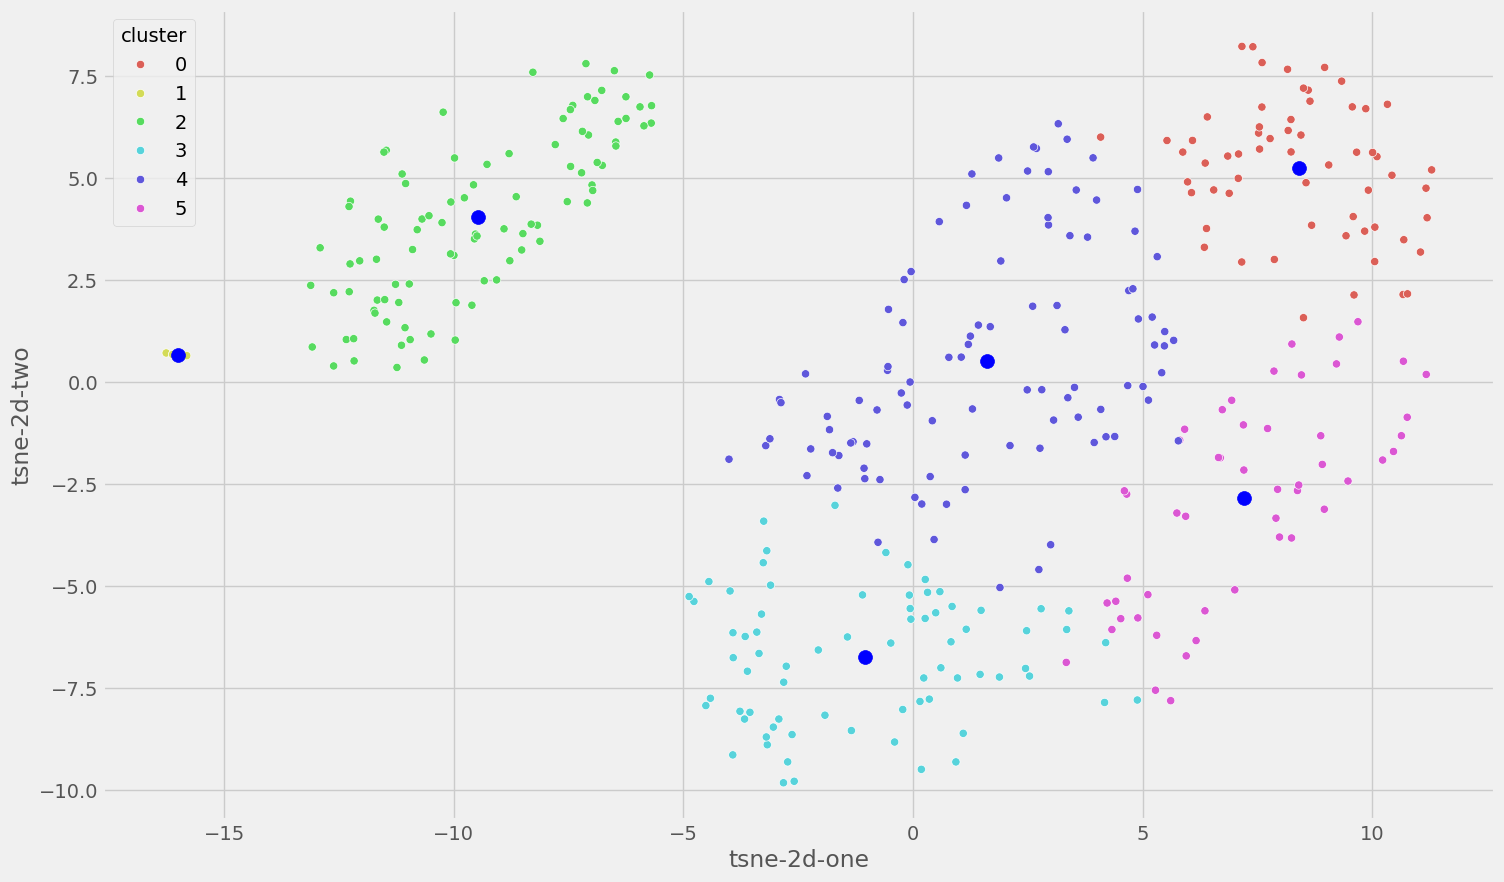

In [72]:
plt.figure(figsize=(16,10))

sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="cluster",
    palette=sns.color_palette("hls", 6),
    data=final_dataset,
    legend="full",
    alpha=1
)

plt.scatter(x="tsne-2d-one", y="tsne-2d-two", data=tsne_cluster, s=100, c='b')

plt.show()

In [73]:
centers = kmeans_cluster_model.cluster_centers_

In [74]:
pts = np.asarray(new_data)

In [75]:
pts

array([[0.03813281, 0.05263158, 0.51209855, 0.88495446, 0.71662125],
       [0.50295858, 0.49707602, 0.51626613, 0.23136629, 0.23433243],
       [0.0443787 , 0.05263158, 0.49222476, 0.86347879, 0.30517711],
       ...,
       [0.51742275, 0.47368421, 0.57788924, 0.22188316, 0.16348774],
       [0.50558843, 0.49122807, 0.57870081, 0.2304837 , 0.24250681],
       [0.03057199, 0.01754386, 0.14970523, 0.90324786, 0.45776567]])

In [76]:
total_dist = pd.Series()

In [77]:

def get_sum_square_distance(data, kmeans_cluster_model):
    centers = kmeans_cluster_model.cluster_centers_
    pts = np.asarray(data[requi_feature_cols])
    total_dist = pd.Series()
    for i in range(len(pts)):
        dist = 0
        for j in range(len(centers)):
            a = np.linalg.norm(pts[i] - centers[j])
            dist += a**2
        total_dist.loc[i] = dist  # Fixed deprecated set_value usage

    return total_dist


In [78]:
def get_sum_square_distance(data, kmeans_cluster_model):
    centers = kmeans_cluster_model.cluster_centers_
    pts = np.asarray(data[requi_feature_cols])
    total_dist = pd.Series()
    for i in range(len(pts)):
        dist = 0
        for j in range(len(centers)):
            a = np.linalg.norm(pts[i] - centers[j])
            dist += a**2
        total_dist.loc[i] = dist

    return total_dist

(array([ 40., 140.,  94.,   8.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          2.,   5.,   8.,  26.,  23.,  17.,   5.,   5.,   3.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.,   0.,   0.,   4.,   2.,   1.,
          2.]),
 array([1.12217365e+07, 1.22579496e+07, 1.32941628e+07, 1.43303760e+07,
        1.53665892e+07, 1.64028024e+07, 1.74390155e+07, 1.84752287e+07,
        1.95114419e+07, 2.05476551e+07, 2.15838683e+07, 2.26200814e+07,
        2.36562946e+07, 2.46925078e+07, 2.57287210e+07, 2.67649342e+07,
        2.78011473e+07, 2.8837

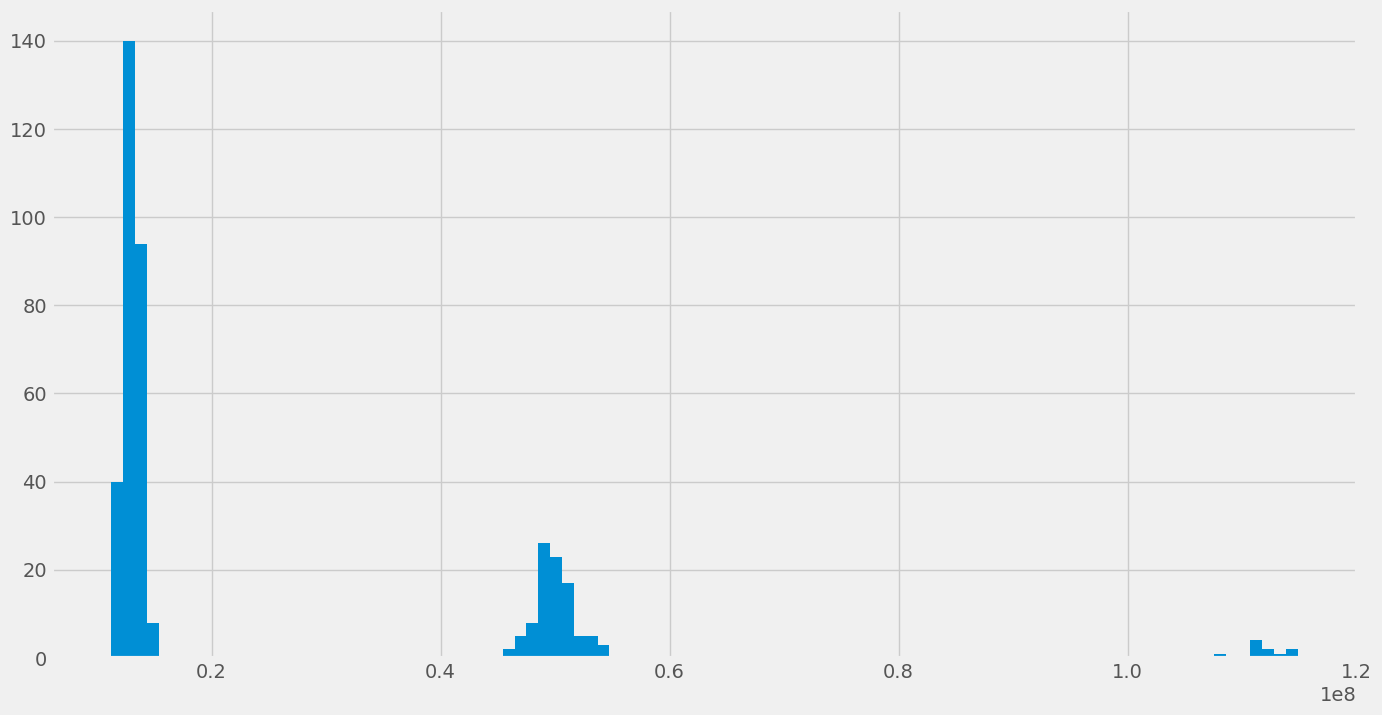

In [79]:
final_dataset['sum_squa_dist'] = get_sum_square_distance(final_dataset, kmeans_cluster_model)

plt.hist(final_dataset['sum_squa_dist'], bins=100)

In [80]:

cutoff = final_dataset['sum_squa_dist'].quantile(0.95)  # Dynamically set threshold
final_dataset['anomaly_kmeans'] = (final_dataset['sum_squa_dist'] >= cutoff).astype(int)


In [81]:
final_dataset['anomaly_kmeans'] = (final_dataset['sum_squa_dist'] >= cutoff).astype(int)

<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

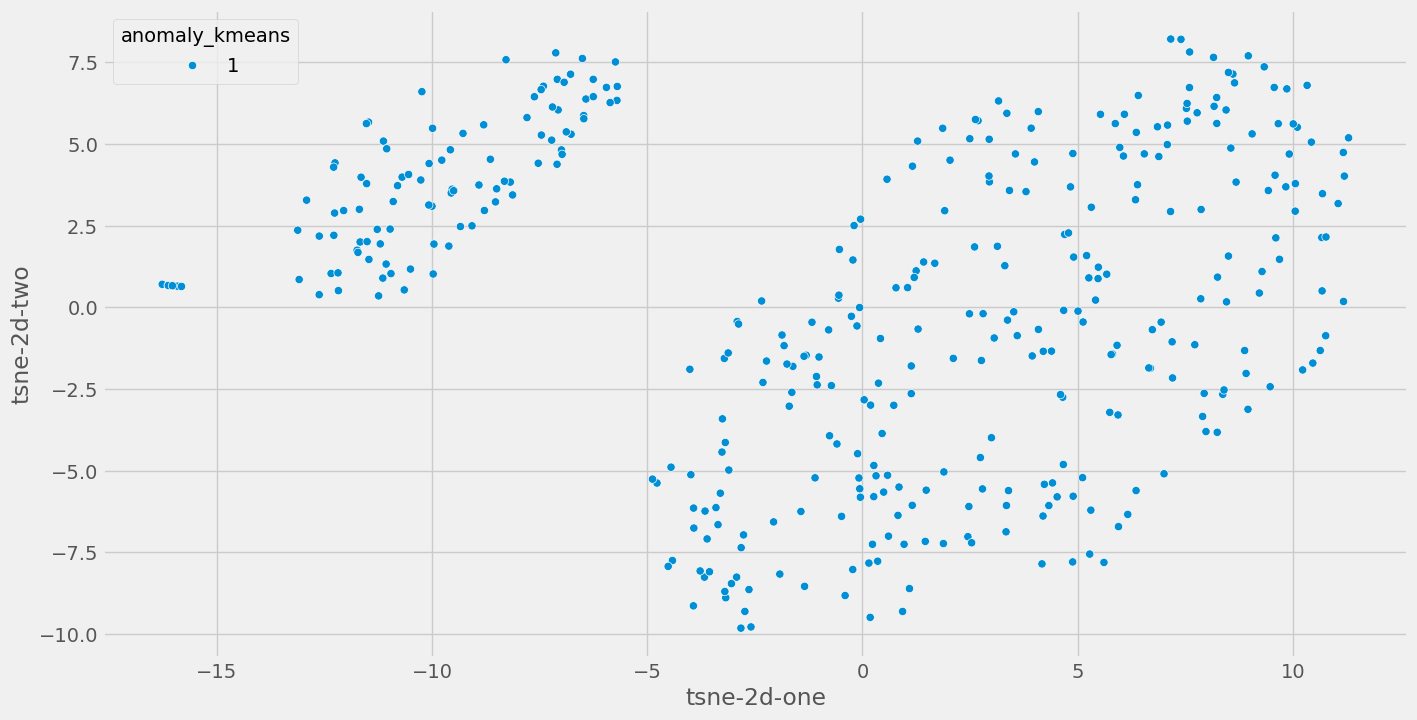

In [82]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_kmeans",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [83]:
final_dataset.loc[final_dataset['anomaly_kmeans']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,sum_squa_dist,anomaly_kmeans
0,10.1.1.1,1446,40.0,6.194030,28.999308,362.0,5,8.370665,-2.659535,1.333984e+07,1
1,10.1.1.100,2860,78.0,6.204030,14.427072,185.0,2,-11.517192,3.791623,4.931029e+07,1
2,10.1.1.101,1465,40.0,6.146341,28.520492,211.0,4,0.570779,3.925673,1.315302e+07,1
3,10.1.1.106,1408,35.5,5.458716,29.771144,319.0,3,-0.402553,-8.817797,1.251195e+07,1
4,10.1.1.109,1459,42.5,5.786047,28.711934,278.0,3,0.315593,-5.152956,1.324532e+07,1
...,...,...,...,...,...,...,...,...,...,...,...
381,10.1.2.86,4307,111.0,6.083882,9.441013,122.0,1,-16.029039,0.665920,1.114503e+08,1
382,10.1.2.89,2826,73.5,6.227621,14.612743,207.0,2,-12.283648,4.295907,4.819806e+07,1
383,10.1.2.90,2904,76.0,6.351899,14.215639,159.0,2,-11.200409,1.946127,5.077643e+07,1
384,10.1.2.95,2868,77.5,6.353846,14.407394,188.0,2,-12.261580,2.890694,4.959145e+07,1


# Isolated Forest

In [84]:
from sklearn.ensemble import IsolationForest

In [85]:

from sklearn.ensemble import IsolationForest
iso_model = IsolationForest(n_estimators=200, max_features=3, random_state=30)
iso_model.fit(new_data)

scores = iso_model.decision_function(new_data)
threshold = np.percentile(scores, 5)  # Set threshold dynamically
final_dataset['anomaly_isolated'] = (scores < threshold).astype(int)


In [86]:
final_dataset.columns

Index(['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio',
       'td_mean', 'td_max', 'cluster', 'tsne-2d-one', 'tsne-2d-two',
       'sum_squa_dist', 'anomaly_kmeans'],
      dtype='object')

In [87]:
new_data.head()

,total_count,daily_counts,is_weekend_ratio,td_mean,td_max
0,0.038133,0.052632,0.512099,0.884954,0.716621
1,0.502959,0.497076,0.516266,0.231366,0.234332
2,0.044379,0.052632,0.492225,0.863479,0.305177
3,0.025641,0.000000,0.205662,0.919573,0.599455
4,0.042406,0.081871,0.342074,0.872065,0.487738


In [88]:
iso_model =  IsolationForest(n_jobs=-1, n_estimators=200, max_features=3, random_state=RANDOM_STATE, contamination=outlier_frac)

In [89]:
iso_model.fit(new_data)

IsolationForest(contamination=0.028, max_features=3, n_estimators=200,
                n_jobs=-1, random_state=30)

In [90]:
final_dataset['anomaly_isolated'] = pd.Series(iso_model.predict(new_data))

In [91]:
final_dataset['anomaly_isolated'] = final_dataset['anomaly_isolated'].map( {1: 0, -1: 1} )

In [92]:
final_dataset['anomaly_isolated'].value_counts()

,count
anomaly_isolated,
0,375
1,11


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

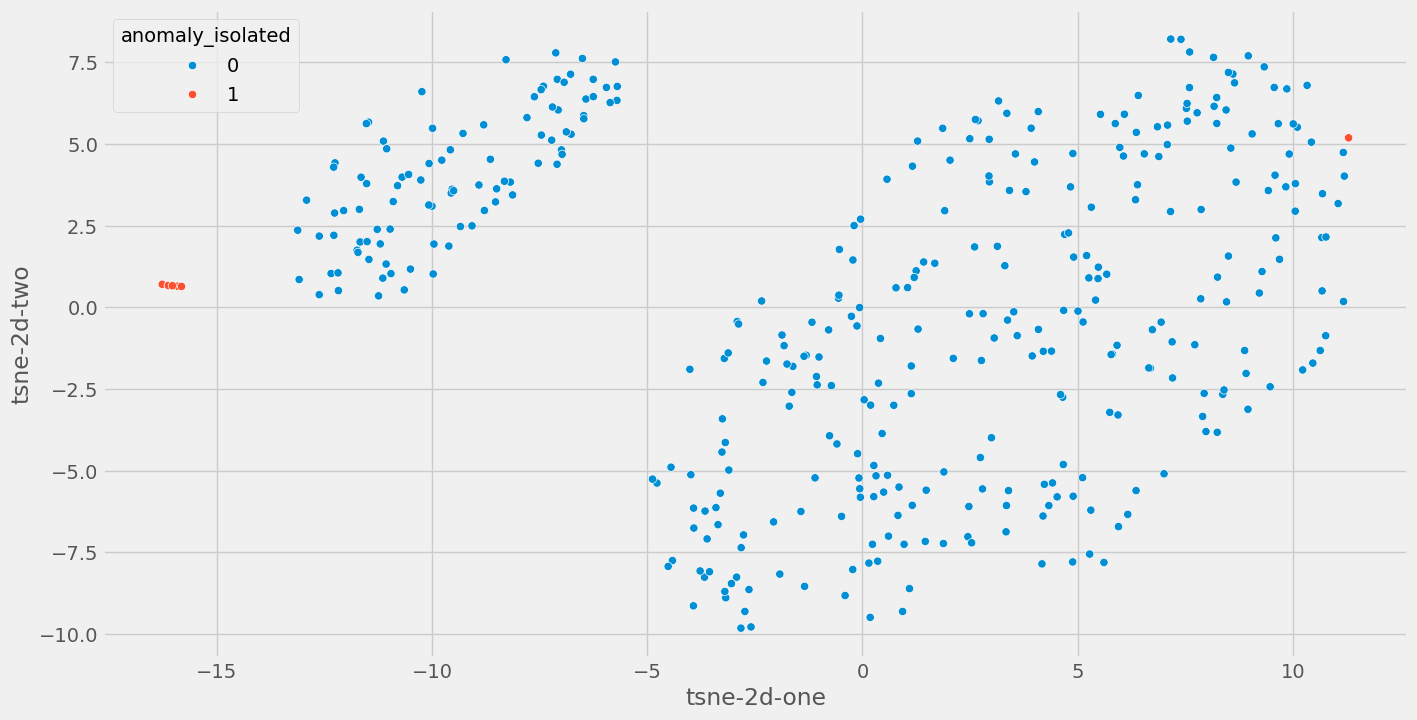

In [93]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_isolated",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [94]:
final_dataset.loc[final_dataset['anomaly_isolated']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,sum_squa_dist,anomaly_kmeans,anomaly_isolated
62,10.1.1.249,4301,116.5,6.004886,9.459535,101.0,1,-16.054724,0.667709,1.111199e+08,1,1
118,10.1.1.386,4300,118.5,6.388316,9.453361,104.0,1,-15.853061,0.647208,1.110748e+08,1,1
163,10.1.1.483,1330,39.0,7.364780,31.564334,316.0,0,11.293157,5.193388,1.122174e+07,1,1
164,10.1.1.486,4317,117.0,5.611026,9.417285,108.0,1,-16.265533,0.709595,1.119566e+08,1,1
177,10.1.1.63,4339,112.0,6.136513,9.368142,101.0,1,-16.005508,0.660466,1.130836e+08,1,1
188,10.1.1.86,4293,113.0,6.276271,9.456897,110.0,1,-15.921069,0.654579,1.107140e+08,1,1
255,10.1.2.249,4353,112.0,5.876777,9.332721,102.0,1,-16.126842,0.673619,1.138148e+08,1,1
311,10.1.2.386,4326,108.0,5.910543,9.392370,110.0,1,-16.124582,0.673376,1.124138e+08,1,1
357,10.1.2.486,4251,114.0,6.316695,9.571059,99.0,1,-15.909336,0.651101,1.085487e+08,1,1
370,10.1.2.63,4372,121.0,6.435374,9.268588,118.0,1,-15.818895,0.644437,1.148431e+08,1,1


# One Class SVM

In [95]:
from sklearn.svm import OneClassSVM

In [96]:
svm_model =  OneClassSVM(nu=outlier_frac, degree=2, kernel='rbf')

In [97]:
new_data_clean = new_data.loc[new_data.total_count <=new_data.total_count.quantile(1-outlier_frac)]

In [98]:
svm_model.fit(new_data_clean)

OneClassSVM(degree=2, nu=0.028)

In [99]:
final_dataset['anomaly_svm'] = pd.Series(svm_model.predict(new_data))

In [100]:
final_dataset['anomaly_svm'] = final_dataset['anomaly_svm'].map( {1: 0, -1: 1} )

In [101]:
final_dataset['anomaly_svm'].value_counts()

,count
anomaly_svm,
0,367
1,19


<Axes: xlabel='tsne-2d-one', ylabel='tsne-2d-two'>

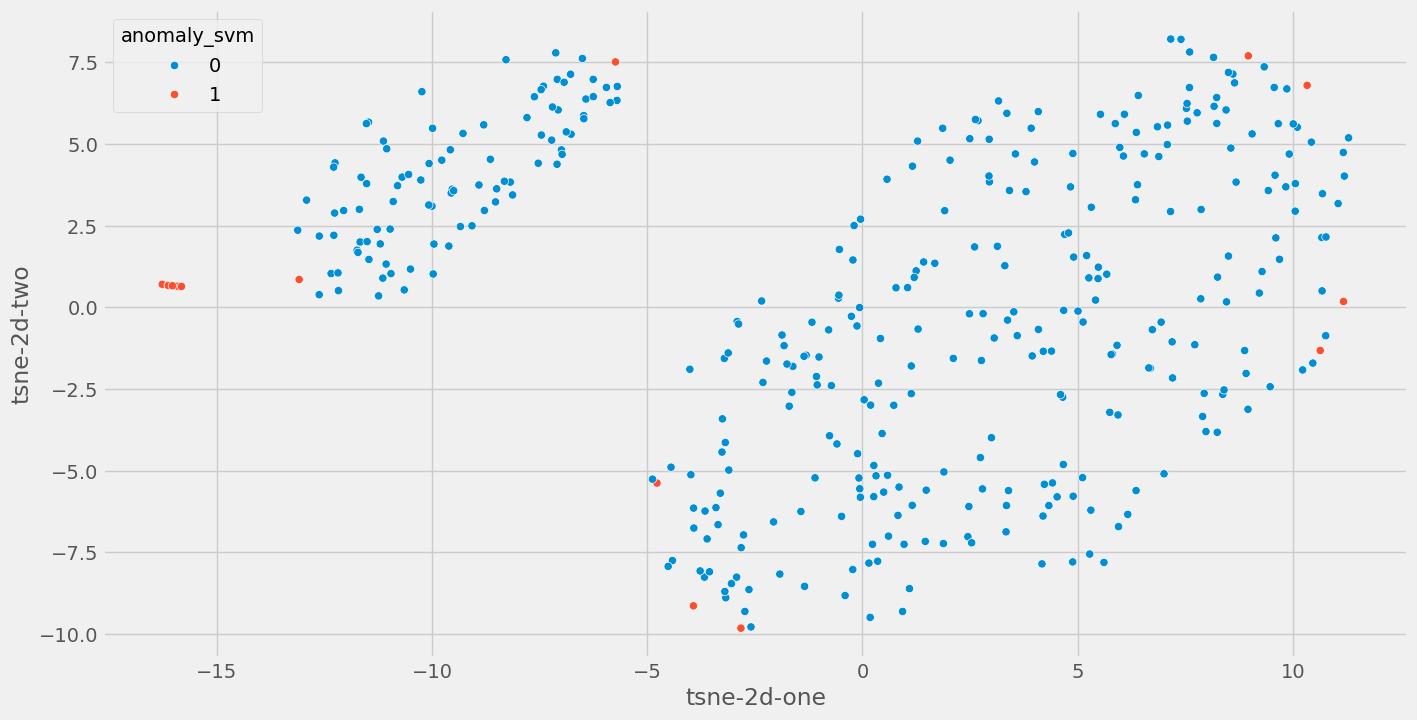

In [102]:
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue="anomaly_svm",
    data=final_dataset,
    legend="full",
    alpha=1
)

In [103]:
final_dataset.loc[final_dataset['anomaly_svm']==1]

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,sum_squa_dist,anomaly_kmeans,anomaly_isolated,anomaly_svm
9,10.1.1.12,1392,40.0,4.974249,30.152408,250.0,3,-3.926554,-9.133054,1.201008e+07,1,0,1
37,10.1.1.186,1372,37.0,4.965217,30.557987,308.0,3,-2.822911,-9.815748,1.187115e+07,1,0,1
62,10.1.1.249,4301,116.5,6.004886,9.459535,101.0,1,-16.054724,0.667709,1.111199e+08,1,1,1
118,10.1.1.386,4300,118.5,6.388316,9.453361,104.0,1,-15.853061,0.647208,1.110748e+08,1,1,1
164,10.1.1.486,4317,117.0,5.611026,9.417285,108.0,1,-16.265533,0.709595,1.119566e+08,1,1,1
177,10.1.1.63,4339,112.0,6.136513,9.368142,101.0,1,-16.005508,0.660466,1.130836e+08,1,1,1
183,10.1.1.73,1484,40.5,5.480349,28.191504,195.0,3,-4.772808,-5.374571,1.345033e+07,1,0,1
188,10.1.1.86,4293,113.0,6.276271,9.456897,110.0,1,-15.921069,0.654579,1.107140e+08,1,1,1
225,10.1.2.178,1400,39.0,7.284024,29.964975,258.0,0,10.329907,6.799660,1.216804e+07,1,0,1
233,10.1.2.195,2859,76.5,6.919668,14.448915,206.0,2,-13.084934,0.856228,4.932382e+07,1,0,1


# Performance of the Algorithm

We must manually categorise the data and examine the performance of the individual algos because it is unsupervised.

In [104]:
total_counts_condition = (final_dataset['total_count'] >= final_dataset['total_count'].quantile(0.90))
daily_counts_condition =  (final_dataset['daily_counts'] >= final_dataset['daily_counts'].quantile(0.90))

In [105]:
final_dataset['anomaly_manual'] = (total_counts_condition | daily_counts_condition).astype(int)

In [106]:
final_dataset.head()

,ip_address,total_count,daily_counts,is_weekend_ratio,td_mean,td_max,cluster,tsne-2d-one,tsne-2d-two,sum_squa_dist,anomaly_kmeans,anomaly_isolated,anomaly_svm,anomaly_manual
0,10.1.1.1,1446,40.0,6.194030,28.999308,362.0,5,8.370665,-2.659535,1.333984e+07,1,0,0,0
1,10.1.1.100,2860,78.0,6.204030,14.427072,185.0,2,-11.517192,3.791623,4.931029e+07,1,0,0,0
2,10.1.1.101,1465,40.0,6.146341,28.520492,211.0,4,0.570779,3.925673,1.315302e+07,1,0,0,0
3,10.1.1.106,1408,35.5,5.458716,29.771144,319.0,3,-0.402553,-8.817797,1.251195e+07,1,0,0,0
4,10.1.1.109,1459,42.5,5.786047,28.711934,278.0,3,0.315593,-5.152956,1.324532e+07,1,0,0,0


In [107]:
from sklearn.metrics import f1_score, roc_auc_score, accuracy_score, confusion_matrix

In [108]:
def get_sensitivity_specificity(y_true, y_pred):
    cf = confusion_matrix(y_true, y_pred)
    sensitivity = cf[0,0]/(cf[:,0].sum())
    specificity = cf[1,1]/(cf[:,1].sum())
    return sensitivity, specificity

In [109]:
f1_iso = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
acc_iso = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
roc_iso = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
sen_iso, spec_iso = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_isolated'])
met_iso = {
           'f1_score': f1_iso,
           'accuracy': acc_iso,
           'roc_score': roc_iso,
           'sensitivity': sen_iso,
           'specificity': spec_iso
          }

In [110]:
f1_kmeans = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
acc_kmeans = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
roc_kmeans = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
sen_kmeans, spec_kmeans = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_kmeans'])
met_kmeans = {
           'f1_score': f1_kmeans,
           'accuracy': acc_kmeans,
           'roc_score': roc_kmeans,
           'sensitivity': sen_kmeans,
           'specificity': spec_kmeans
          }

In [111]:
f1_svm = f1_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
acc_svm = accuracy_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
roc_svm = roc_auc_score(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
sen_svm, spec_svm = get_sensitivity_specificity(final_dataset['anomaly_manual'],final_dataset['anomaly_svm'])
met_svm = {
           'f1_score': f1_svm,
           'accuracy': acc_svm,
           'roc_score': roc_svm,
           'sensitivity': sen_svm,
           'specificity': spec_svm
          }

In [112]:
metrics = {'isolated_forest': met_iso,
           'kmeans': met_kmeans,
           'svm': met_svm
          }

In [113]:
all_metrics = pd.DataFrame.from_dict(metrics)

In [114]:
all_metrics

,isolated_forest,kmeans,svm
f1_score,0.303030,0.249433,0.270270
accuracy,0.880829,0.142487,0.860104
roc_score,0.589399,0.500000,0.577314
sensitivity,0.880000,NaN,0.877384
specificity,0.909091,0.142487,0.526316


# Ensemble models for Classification

In [115]:
from sklearn.preprocessing import LabelEncoder
final_dataset['ip_address'] = LabelEncoder().fit_transform(final_dataset.iloc[:, -1])

In [116]:
features = ['ip_address', 'total_count', 'daily_counts', 'is_weekend_ratio', 'td_mean', 'td_max']
X = final_dataset[features]
y = final_dataset['anomaly_isolated']

In [117]:
X, y = final_dataset[features], final_dataset['anomaly_isolated']
X.shape, y.shape

((386, 6), (386,))

## Baseline Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold

rf = OneVsRestClassifier(estimator = GaussianNB())

cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=20)

n_scores = cross_val_score(rf, X, y, scoring='f1_weighted', cv=cv, error_score='raise')

print(n_scores)
print('Baseline scores \n mean f1 weighted: %.3f with a %.3f standard deviation in scores ' % (np.mean(n_scores), np.std(n_scores)))

[0.91306815 0.92877493 0.86485671 0.94457323 0.96084546 0.95655271
 0.96070175 0.91064618 0.91064618 0.87780396 0.92877493 0.83100233
 0.94457323 0.91306815 0.92877493 0.95655271 0.94306894 0.87780396
 0.94306894 0.96070175 0.96084546 0.91306815 0.91306815 0.89725275
 0.91306815 0.86824618 0.89434985 1.         0.94306894 0.96070175]
Baseline scores 
 mean f1 weighted: 0.924 with a 0.036 standard deviation in scores 


## Stacking Classifier

Stacking classifier takes:
1. estimators: List of baseline classifiers

2. final_estimator: Defined meta classifier

3. cv: Number of cross validations to perform

In [119]:
def create_stacking_models():
    base_models = list()
    base_models.append(('KNNC', KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                                     , weights = 'distance')
                       ))
    base_models.append(('SVC', SVC(kernel = 'linear'
                                   , class_weight = 'balanced'
                                  , break_ties = True)
                       ))
    base_models.append(('GNB', GaussianNB()))
    base_models.append(('RF', RandomForestClassifier(n_estimators= 200,
                                                   oob_score = True,
                                                   class_weight = "balanced",
                                                   random_state = 20,
                                                   ccp_alpha = 0.1)
                       ))


    meta_model = LogisticRegression()
    final_model = StackingClassifier(estimators = base_models, ##Base estimators which will be stacked together
                                     final_estimator = meta_model,
                                     cv = 5
                                    )
    return final_model

def models_all():
    all_models = dict()
    all_models['KNNC']= KNeighborsClassifier(n_neighbors = len(np.unique(y))
                                             , weights = 'distance')
    all_models['SVC']= SVC(kernel = 'linear'
                           , class_weight = 'balanced'
                          , break_ties = True
                          )
    all_models['RF']= RandomForestClassifier(n_estimators= 200,
                                                   oob_score = True,
                                                   class_weight = "balanced",
                                                   random_state = 20,
                                                   ccp_alpha = 0.15)
    all_models['GNB'] = GaussianNB()
    all_models['Stacking'] = create_stacking_models()
    return all_models

def evaluate_model(model):
    cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=42)
    scores = cross_val_score(model, X, y, scoring='f1_weighted', cv=cv, error_score='raise')
    return scores

In [120]:
model_results = list()
models = models_all()
names = list()

for name, model in models.items():
    scores = evaluate_model(model)
    model_results.append(scores)
    names.append(name)

    print('>%s %.3f (%.3f) \n' % (name, np.mean(scores), np.std(scores)))

>KNNC 0.994 (0.012) 

>SVC 0.996 (0.011) 

>RF 0.996 (0.011) 

>GNB 0.921 (0.035) 

>Stacking 0.996 (0.011) 



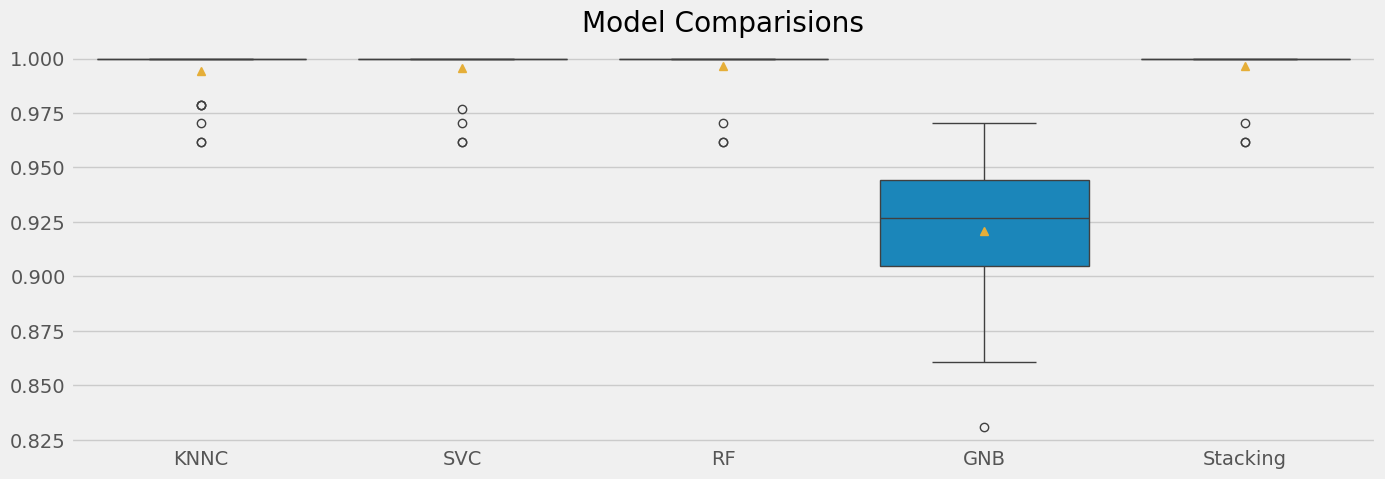

In [121]:
plt.figure(figsize=(15,5))

flattened_results = np.ravel(model_results)

repeated_names = np.repeat(names, len(model_results[0]))

fig = sns.boxplot(x=repeated_names, y=flattened_results, showmeans=True)
plt.title("Model Comparisions")
plt.show()

### Conclusion
- With a stacking model, we were able to get an F1 score of 99.6%, which was same as the target of 99.6%